In [7]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

import pandas as pd

import json
import glob
import os

In [8]:
base_path = "/amd.home/home/i11/zeitz/experiments/tdcch_vldb20/"
paths = glob.glob(base_path + "customization_scaling/*.json")
data = [json.load(open(path)) for path in paths]

In [16]:
customization_running_times = pd.DataFrame.from_records([{ 'num_threads': run['num_threads'], 'customization_running_time_s': algo['main']['running_time_ms'] / 1000 } for run in data for algo in run["algo_runs"] if algo['algo'] == "Floating TDCCH Customization"])
customization_running_times['work'] = customization_running_times['num_threads'] * customization_running_times['customization_running_time_s']

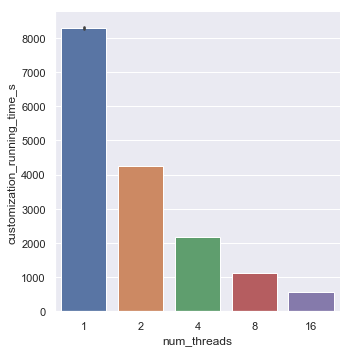

In [10]:
sns.catplot(x="num_threads", y="customization_running_time_s", kind="bar", data=customization_running_times);

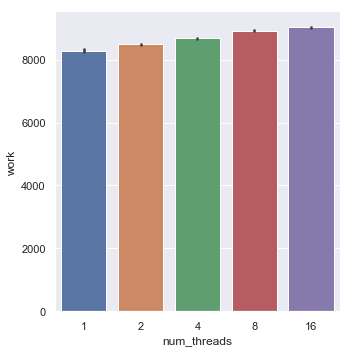

In [17]:
sns.catplot(x="num_threads", y="work", kind="bar", data=customization_running_times);

In [14]:
customization_running_times.groupby('num_threads')['customization_running_time_s'].mean()

num_threads
1     8288.2070
2     4242.3342
4     2171.4710
8     1114.3678
16     564.1110
Name: customization_running_time_s, dtype: float64

In [15]:
customization_running_times.groupby('num_threads')['customization_running_time_s'].std()

num_threads
1     50.261101
2      5.519159
4      4.941765
8      2.352714
16     1.853040
Name: customization_running_time_s, dtype: float64